<a href="https://colab.research.google.com/github/souravkarma/Sourav-Karmakar-Airline-passenger-referral-prediction/blob/main/Sourav_Karmakar_Airline_passenger_referral_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb 




In [2]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the xlsx file from drive
df=pd.read_excel("/content/drive/MyDrive/Sourav Karmakar-Airline passenger referral prediction/Airline Passenger Referral Prediction/data_airline_reviews.xlsx")

In [7]:
df.head().T

,0,1,2,3,4
airline,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN
overall,NaN,7.0,NaN,2.0,NaN
author,NaN,Christopher Hackley,NaN,Adriana Pisoi,NaN
review_date,NaN,8th May 2019,NaN,7th May 2019,NaN
customer_review,NaN,âœ… Trip Verified | London to Izmir via Istanb...,NaN,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN
aircraft,NaN,NaN,NaN,NaN,NaN
traveller_type,NaN,Business,NaN,Family Leisure,NaN
cabin,NaN,Economy Class,NaN,Economy Class,NaN
route,NaN,London to Izmir via Istanbul,NaN,Istanbul to Bucharest,NaN
date_flown,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [9]:
#let's calculate the null values 
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [11]:
#drop the null values
df.dropna(how='all',inplace=True)


In [12]:
#Counting number of duplicate values
df.duplicated().sum()

4764

In [13]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [15]:
df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [17]:
top6_airlines=df['airline'].value_counts()[0:6]
top6_airlines

Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Name: airline, dtype: int64

Text(0.5, 1.0, 'Top 6 Most Frequent Used Airlines')

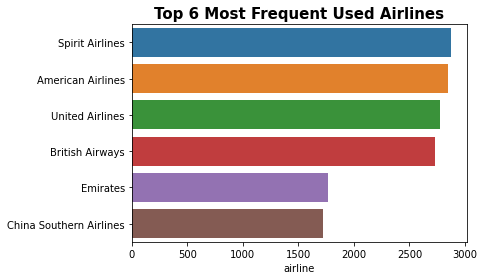

<Figure size 1440x720 with 0 Axes>

In [20]:
#visualize top 6 most frequent used airlines
graph=sns.barplot(x=top6_airlines,y=top6_airlines.index,data=df)
plt.figure(figsize=(20,10))
graph.set_title("Top 6 Most Frequent Used Airlines",fontsize=15,fontweight='bold')

* From the Bar graph we can conclude that Spirit Airways is the most frequently used airlines with a total count of around 2800 according to the dataset given

In [22]:
top10_aircraft=df['aircraft'].value_counts()[0:10]
top10_aircraft

A320                2130
A380                1109
Boeing 777          1101
Boeing 737-800      1021
A330                 974
Boeing 787           833
Boeing 777-300ER     737
A321                 649
Boeing 737           649
A319                 639
Name: aircraft, dtype: int64

Text(0.5, 1.0, 'Top 10 Most Frequent Used Aircraft')

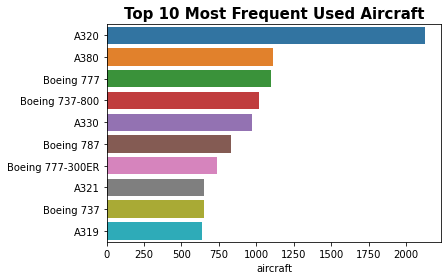

<Figure size 1440x720 with 0 Axes>

In [23]:
#visualize top 10 most frequent used aircraft
graph=sns.barplot(x=top10_aircraft,y=top10_aircraft.index,data=df)
plt.figure(figsize=(20,10))
graph.set_title("Top 10 Most Frequent Used Aircraft",fontsize=15,fontweight='bold')

*  we can see that **aircraft A320** has travelled most frequently and also been used by most of the people.